# PCA on Fisher Iris Data and Palmer Penguins Data
Import libraries.

In [1]:
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import seaborn as sns

## Fisher Iris Data
The data set contains measurements of 150 iris flowers in terms of their sepal length, sepal width, petal length, and petal width. There are 3 species of flowers, Setosa, Versicolor, and Virginica, with 50 samples each. Load the data then visualize its pair plot.

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

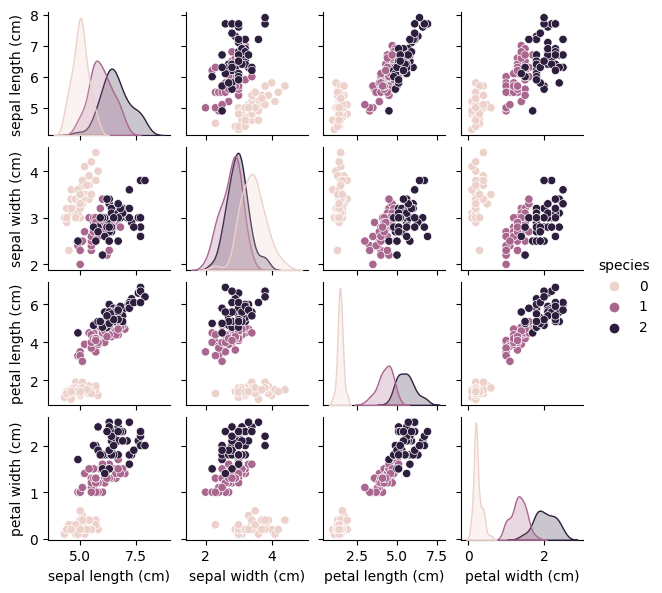

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris.frame.rename(columns={"target": "species"}, inplace=True)
print(iris.frame)
sns.pairplot(iris.frame, hue='species', height=1.5)
plt.show()

The scatter plots above visualize only 2 dimensions (features) at a time. Using PCA, we can visualize 2 new dimensions that capture the variations from all 4 features, while retaining their information content. 

Explained variance ratio:    [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative percent variance: [ 72.96244541  95.8132072   99.48212909 100.        ]


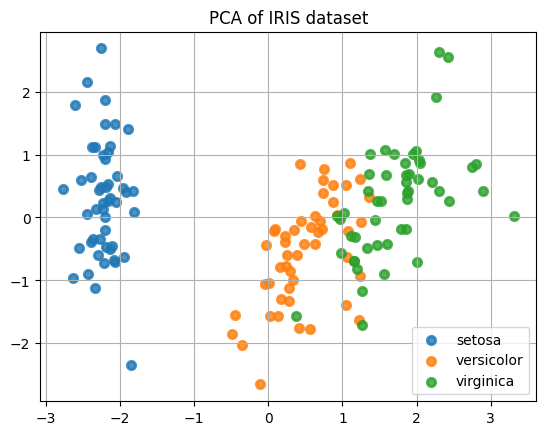

In [3]:
from sklearn.decomposition import PCA

X,y = iris.data, iris.target

# Perform Standard Scaling then PCA
pca = make_pipeline(StandardScaler(), PCA())
X_pca = pca.fit(X).transform(X)
var = pca[1].explained_variance_ratio_
print("Explained variance ratio:    %s" % str(var))
print("Cumulative percent variance: %s" % str(np.cumsum(var)*100))

# Plot the first 2 principal components
for i, target_name in zip([0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
                alpha=0.8, lw=2, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.grid()
plt.show()

## Palmer Penguins Data
This data set contains 345 penguin samples of their culmen (bill) length, culmen depth, flipper length, body mass index, island of origin, and sex. The penguins come from Palmer Archipelago, Antarctica. Some samples have missing data. Here, we'll use PCA on the first 4 features and reduce them to 2. 

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         37

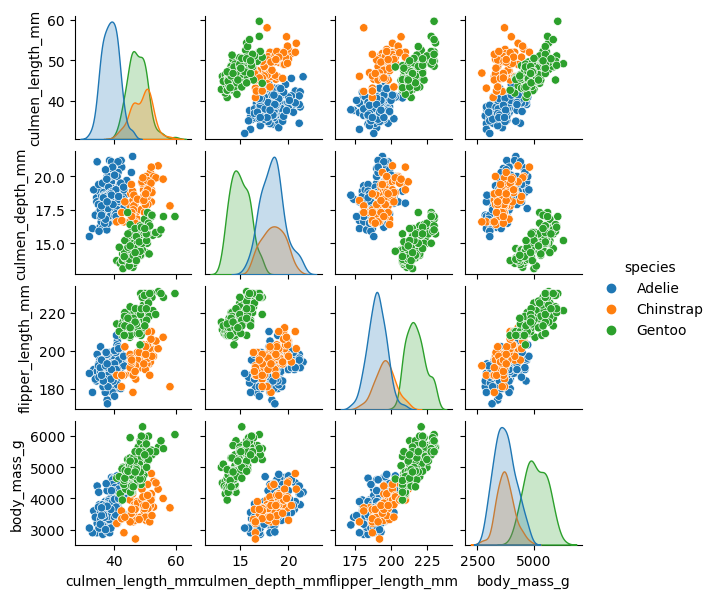

In [4]:
peng = pd.read_csv("penguins.csv")
print(peng)
peng.info()                                         # This reveals how much missing data are there
peng.dropna(inplace=True)                           # This removes rows with missing data
peng.drop(['island', 'sex'], axis=1, inplace=True)  # We will not use the island and sex info
sns.pairplot(peng, hue="species", height=1.5)       # Plot scatter matrix of the 4 features
plt.show()

Explained variance ratio:    [0.68641678 0.19448404 0.09215558 0.02694359]
Cumulative percent variance: [ 68.64167849  88.09008256  97.30564056 100.        ]


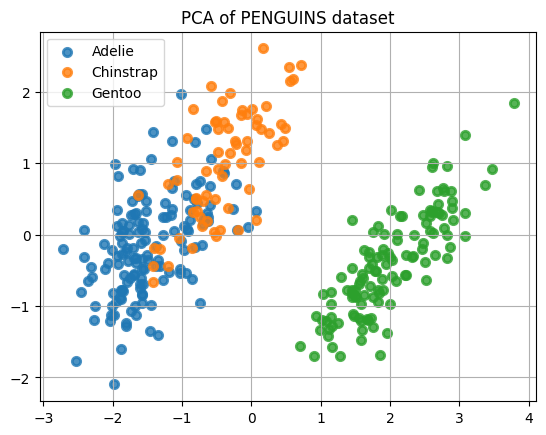

In [5]:
X,y = peng.iloc[:,1:].to_numpy(), pd.factorize(peng['species'])[0]

# Perform Standard Scaling then PCA
pca = make_pipeline(StandardScaler(), PCA())
X_pca = pca.fit(X).transform(X)
var = pca[1].explained_variance_ratio_
print("Explained variance ratio:    %s" % str(var))
print("Cumulative percent variance: %s" % str(np.cumsum(var)*100))

# Plot the first 2 principal components
for i, target_name in zip([0, 1, 2], peng['species'].unique()):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
                alpha=0.8, lw=2, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of PENGUINS dataset")
plt.grid()
plt.show()

For the same number of principal components, the Fisher Iris data have a higher explained variance than the Palmer Penguins data set. This means that the measurements from the Iris flowers are a lot more correlated. The first 2 principal components already captured 95% of the variation in all 4 features, compared to only 88% in the first 2 principal components of the Palmer Penguins data.